# EXPLORATORY DATA ANALYSIS FOR DIWALI SALES IN INDIA

#### This notebook is intended to understand & learn the basic EDA Analysis using Python. Here, sales during the Diwali festival is analysed.

## Objective

1) This dataset contains sales data from a company, which shows shopping during the Diwali festival period in India.
2) I had to analyze this dataset for various rows and columns and to provide valuable insights which can help for this year    Diwali.
3) My objective is to Improve customer experience by analyzing sales data.
4) To increase there revenue amount. 

# Library Imports

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Data Reading

Dataset is downloaded from https://www.kaggle.com/datasets/prajwal6362venom/diwali-sales

In [2]:
os.chdir(r'C:\Users\RAJAT SINGH\Downloads\Diwali sales')

In [3]:
df=pd.read_csv('Diwali Sales Data.csv', encoding='iso-8859-1')

# Data Cleaning and Preprocessing

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

### Finding null values

In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

### Dropping unnecessary columns

In [7]:
df.drop(columns=['Status','unnamed1'], axis=1, inplace=True)

### Finding the data types for every column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


### Dropping null values from dataset

In [9]:
df.dropna(inplace=True)

### Changing the data type of Amount column

In [10]:
df['Amount']=df['Amount'].astype('int')

# Exploratory Data Analysis

## Gender Distribution

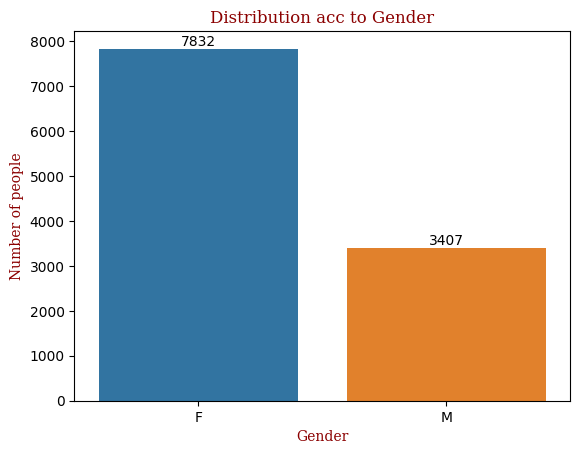

In [11]:
font1 = {'family':'serif','color':'darkred','size':12}
font2 = {'family':'serif','color':'darkred','size':10}

ax=sns.countplot(x='Gender', data=df)
plt.xlabel('Gender', fontdict=font2)
plt.ylabel('Number of people', fontdict=font2)
plt.title('Distribution acc to Gender', fontdict=font1)

for bars in ax.containers:
    ax.bar_label(bars)

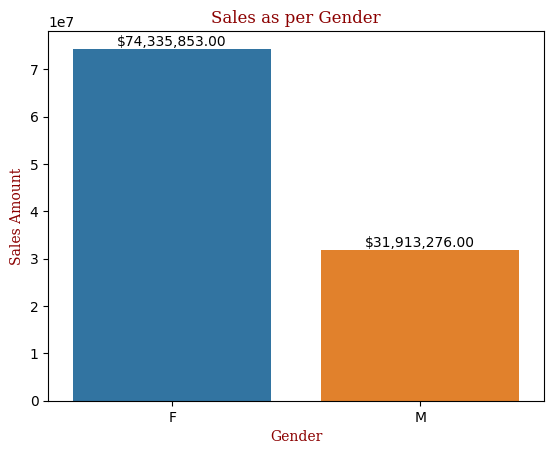

In [12]:
sales_gem=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(x='Gender', y='Amount', data=sales_gem)

for i, v in enumerate(sales_gem['Amount']):
    ax.text(i, v, "${:,.2f}".format(v), ha='center', va='bottom')

ax.set_ylabel('Sales Amount', fontdict=font2)
ax.set_xlabel('Gender', fontdict=font2)
ax.set_title('Sales as per Gender',fontdict=font1)

plt.show()

From above graph we can see that, most of the buyers are female and the purchasing power of females are greater than men.

## Age

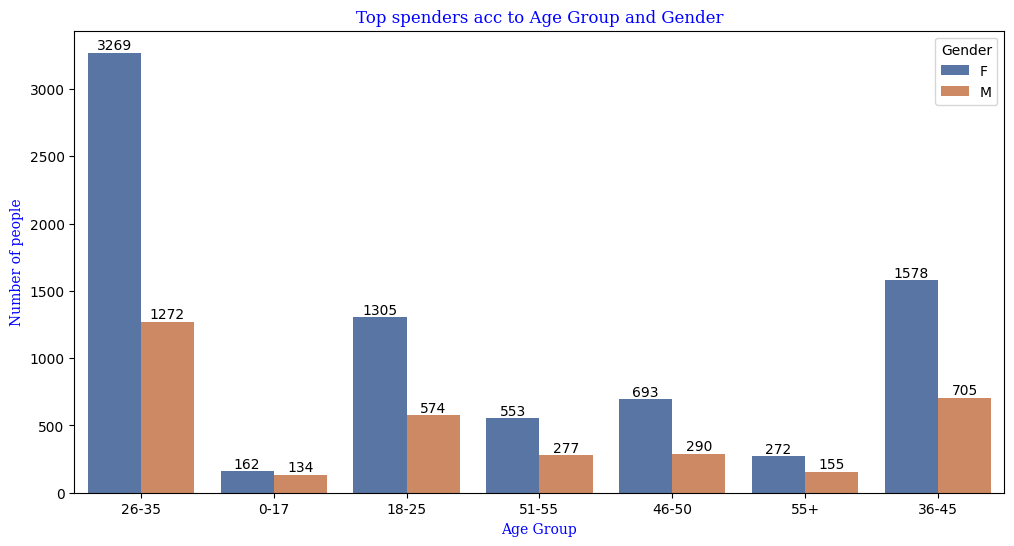

In [13]:
font1 = {'family':'serif','color':'blue','size':12}
font2 = {'family':'serif','color':'blue','size':10}

plt.figure(figsize=(12,6))
ax=sns.countplot(x='Age Group', data=df, hue='Gender', color='blue', palette='deep')
plt.xlabel('Age Group', fontdict=font2)
plt.ylabel('Number of people', fontdict=font2)
plt.title('Top spenders acc to Age Group and Gender', fontdict=font1)

for bars in ax.containers:
    ax.bar_label(bars)

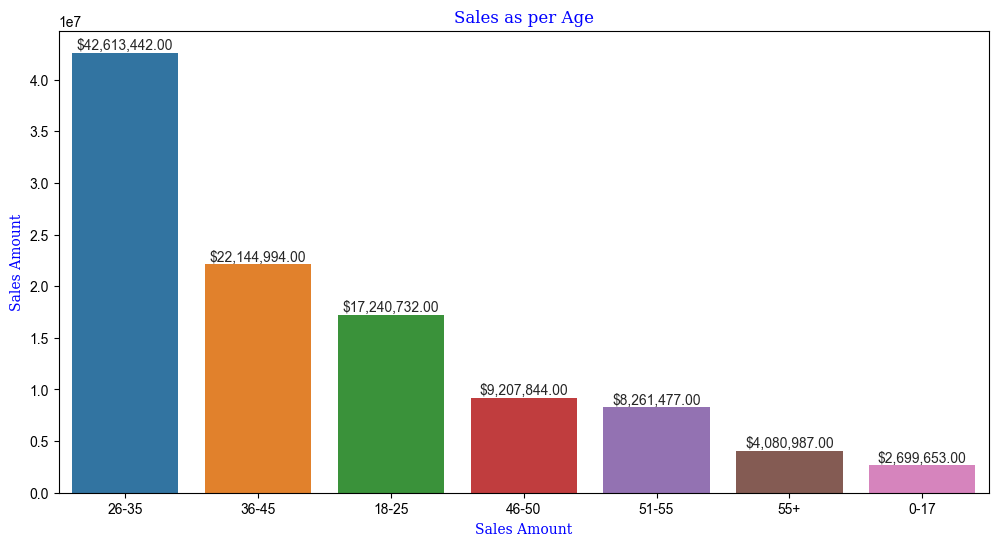

In [14]:
font1 = {'family':'serif','color':'blue','size':12}
font2 = {'family':'serif','color':'blue','size':10}

plt.figure(figsize=(12,6))
sales_age=df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(x='Age Group', y='Amount', data=sales_age)
sns.set_style('darkgrid')

for i, v in enumerate(sales_age['Amount']):
    ax.text(i, v, "${:,.2f}".format(v), ha='center', va='bottom')

ax.set_ylabel('Sales Amount', fontdict=font2)
ax.set_xlabel('Sales Amount', fontdict=font2)
ax.set_title('Sales as per Age', fontdict=font1)

plt.show()

From above graph, we can see that the most buyers are from the age group of 26-35 years.

## State

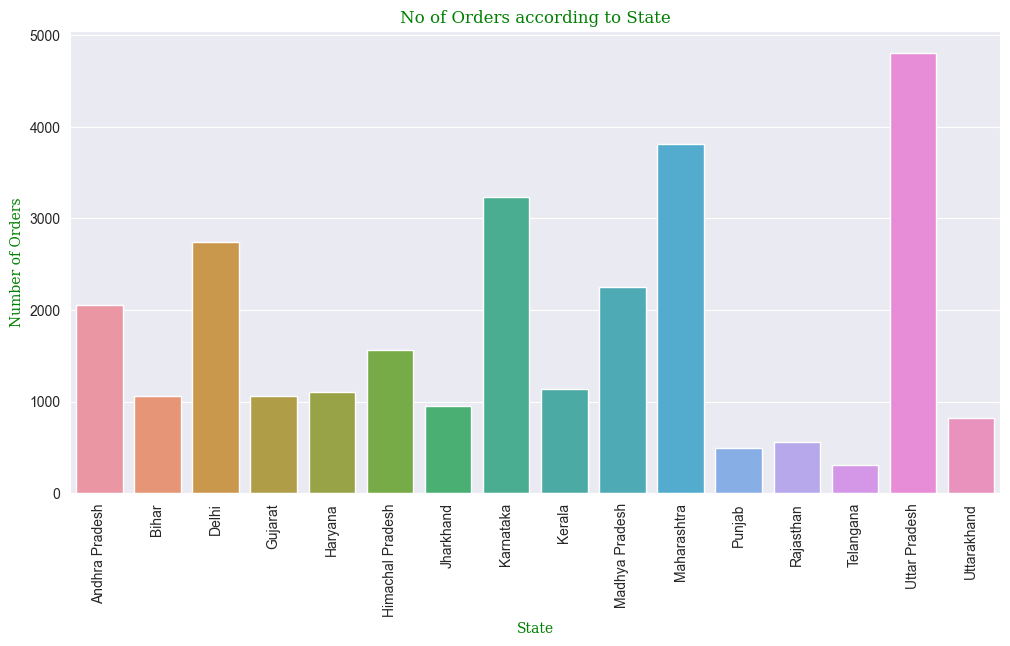

In [15]:
font1 = {'family':'serif','color':'green','size':12}
font2 = {'family':'serif','color':'green','size':10}

plt.figure(figsize=(12,6))
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum()
sales_state.sort_values(by='Orders',ascending=True)
sns.barplot(data = sales_state, x = 'State',y= 'Orders')
plt.xticks(rotation='vertical')
plt.xlabel('State', fontdict=font2)
plt.ylabel('Number of Orders', fontdict=font2)
plt.title('No of Orders according to State', fontdict=font1)
plt.show()

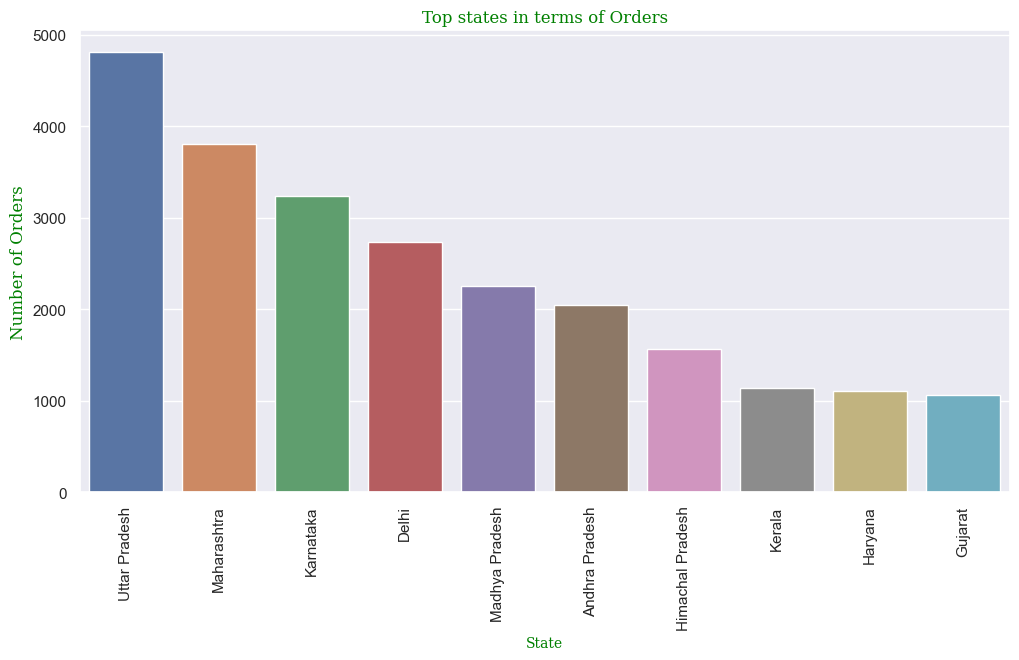

In [16]:
font1 = {'family':'serif','color':'green','size':12}
font2 = {'family':'serif','color':'green','size':10}

# total no of orders from top 10 highest states
orders_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=orders_state, x='State', y='Orders')
plt.xticks(rotation='vertical')
plt.xlabel('State', fontdict=font2)
plt.ylabel('Number of Orders', fontdict=font1)
plt.title('Top states in terms of Orders', fontdict=font1)
plt.show()

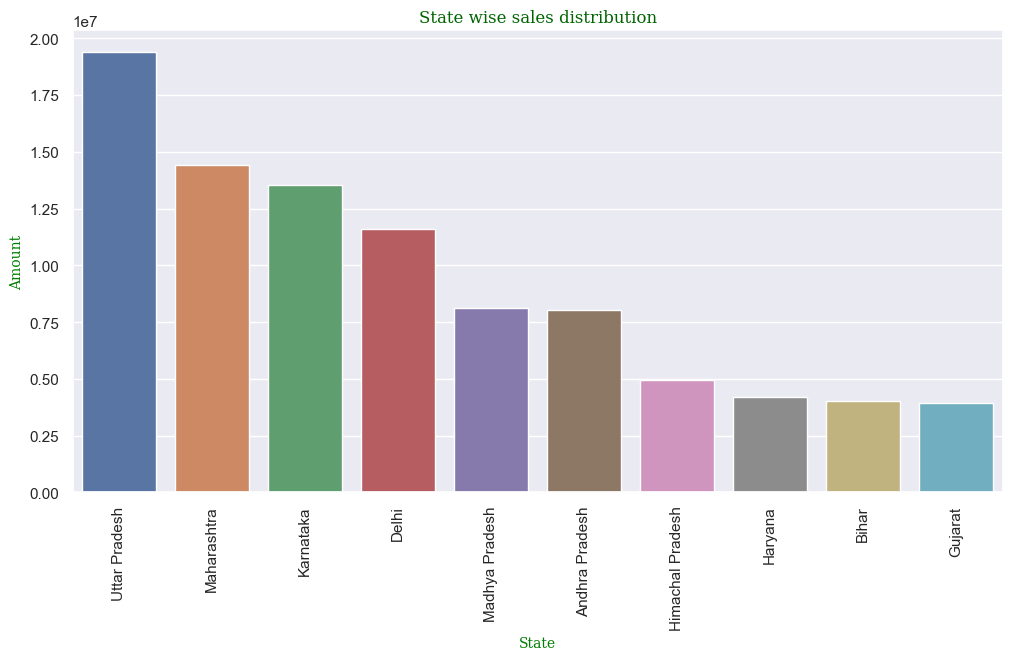

In [17]:
font1 = {'family':'serif','color':'darkgreen','size':12}
font2 = {'family':'serif','color':'green','size':10}

# total amount sales from top 10 states
sales_state=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_state, x='State', y='Amount')
plt.xticks(rotation='vertical')
plt.title('State wise sales distribution', fontdict=font1)
plt.xlabel('State', fontdict=font2)
plt.ylabel('Amount', fontdict=font2)
plt.show()

From the above graph, we can see that most of the buyers are from Uttar Pradesh, Maharashtra and Karnataka respectively. The
highest Sales/Amount are also from Uttar Pradesh, Maharashtra and Karnataka. 

## Marital Status

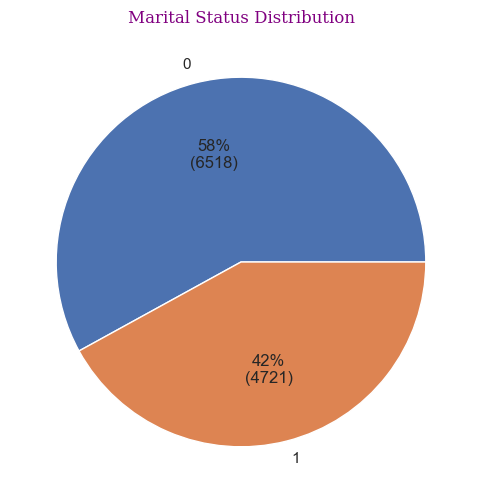

In [18]:
font1 = {'family':'serif','color':'purple','size':12}

status_counts = df['Marital_Status'].value_counts()

plt.figure(figsize=(6, 6))

_, _, autotexts = plt.pie(status_counts, labels=status_counts.index, autopct=lambda p: f'{p:.0f}%\n({p/100*len(df):.0f})')

plt.title('Marital Status Distribution', fontdict=font1)

for i, autotext in enumerate(autotexts):
    count = status_counts[i]
    percentage = count / len(df) * 100
    autotext.set_text(f'{percentage:.0f}%\n({count:.0f})')
    
plt.show()

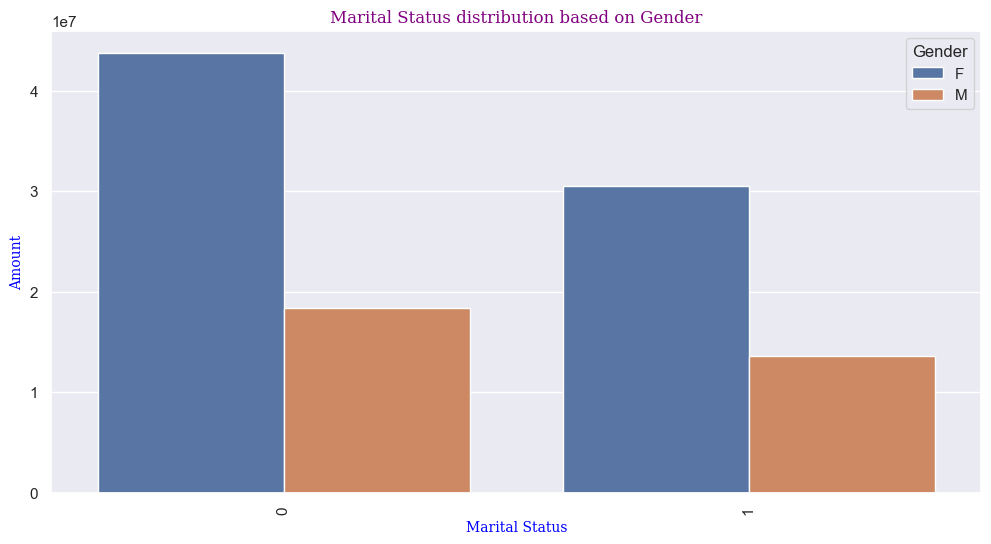

In [19]:
font1 = {'family':'serif','color':'purple','size':12}
font2 = {'family':'serif','color':'blue','size':10}

sales_state=df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')
plt.title('Marital Status distribution based on Gender', fontdict=font1)
plt.xlabel('Marital Status', fontdict=font2)
plt.ylabel('Amount', fontdict=font2)
plt.xticks(rotation='vertical')

plt.show()

From the above graph, we can see that most of the buyers married women and they have high purchasing power.

## Occupation

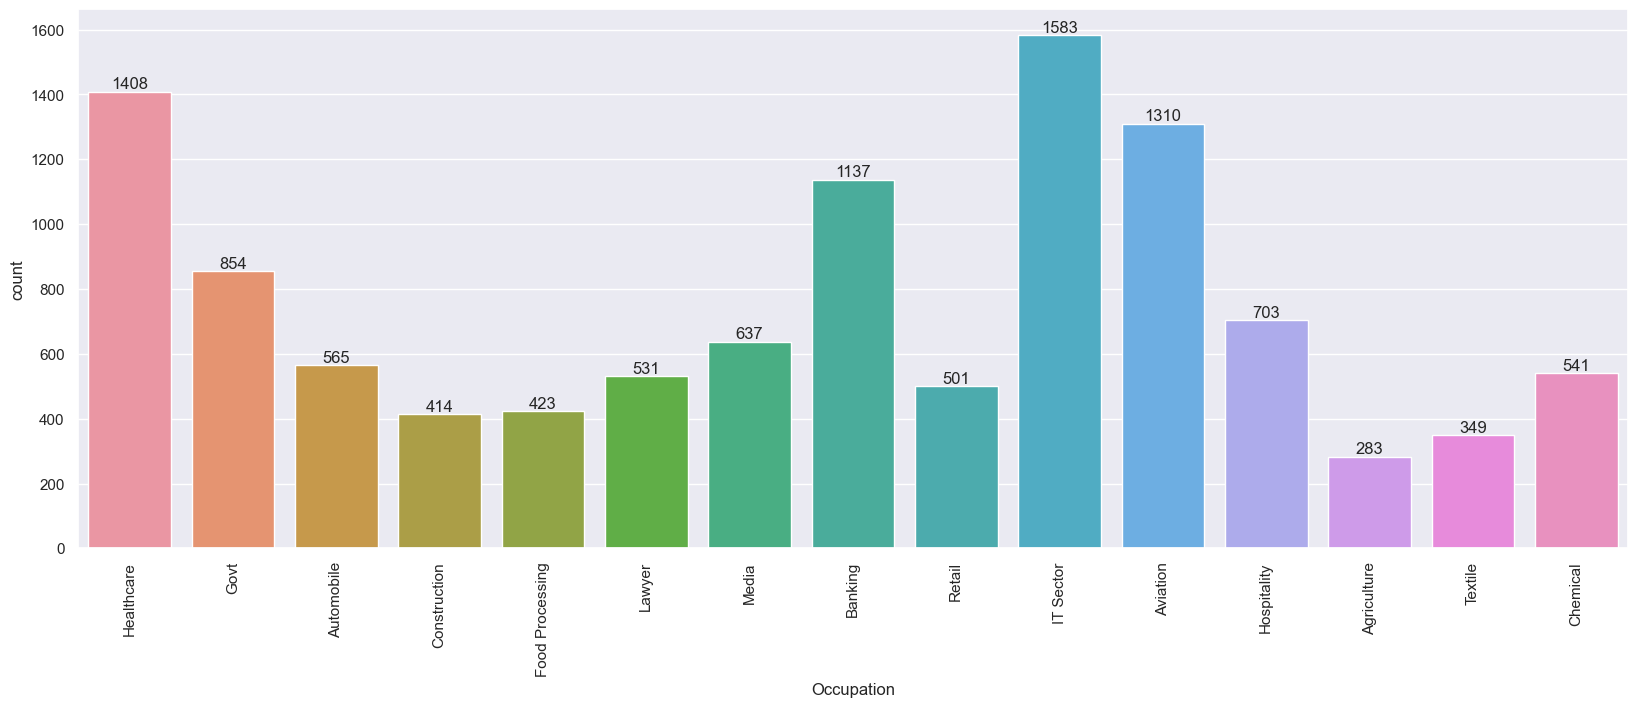

In [20]:
sns.set(rc={'figure.figsize': (20,7)})
ax=sns.countplot(x='Occupation', data=df)
plt.xticks(rotation='vertical')

for bars in ax.containers:
    ax.bar_label(bars)

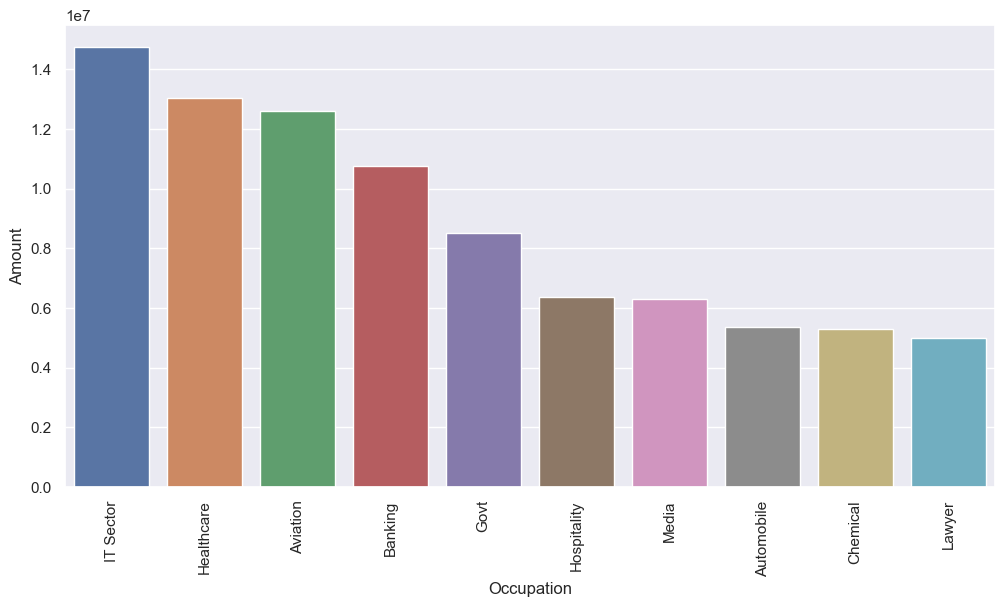

In [21]:
sales_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_occupation, x='Occupation', y='Amount')
plt.xticks(rotation='vertical')

plt.show()

From above graphs we can see that, most of the buyers are working in IT, Healthcare and Aviation sectors.

## Product Category

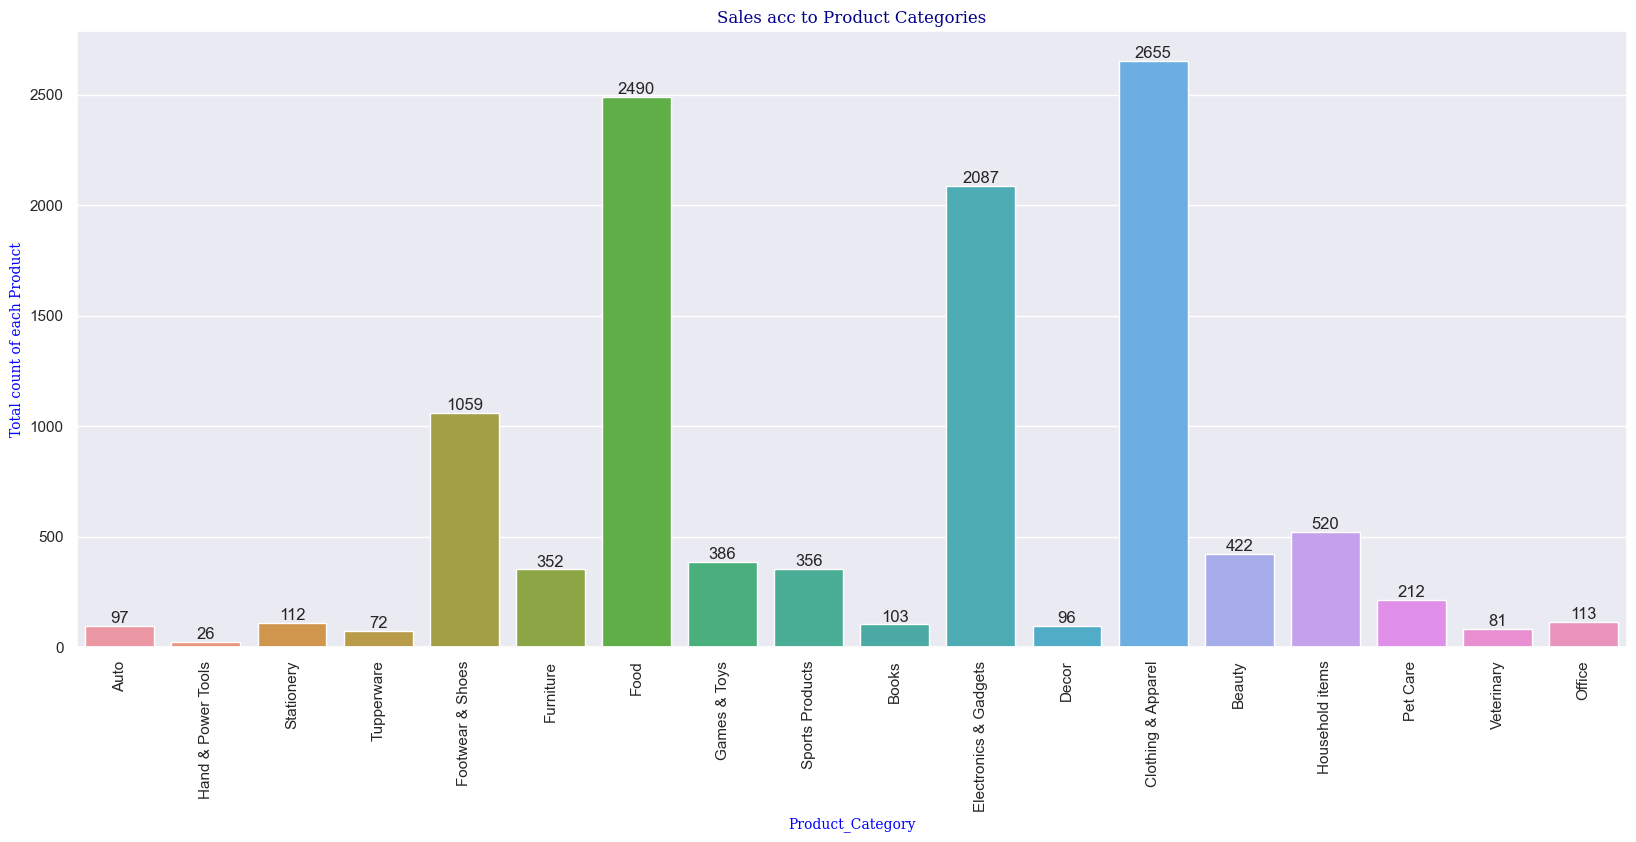

In [22]:
font1 = {'family':'serif','color':'darkblue','size':12}
font2 = {'family':'serif','color':'blue','size':10}

sns.set(rc={'figure.figsize': (20,8)})
ax=sns.countplot(x='Product_Category', data=df)
plt.xticks(rotation='vertical')

plt.title('Sales acc to Product Categories', fontdict=font1)
plt.xlabel('Product_Category', fontdict=font2)
plt.ylabel('Total count of each Product', fontdict=font2)

for bars in ax.containers:
    ax.bar_label(bars)

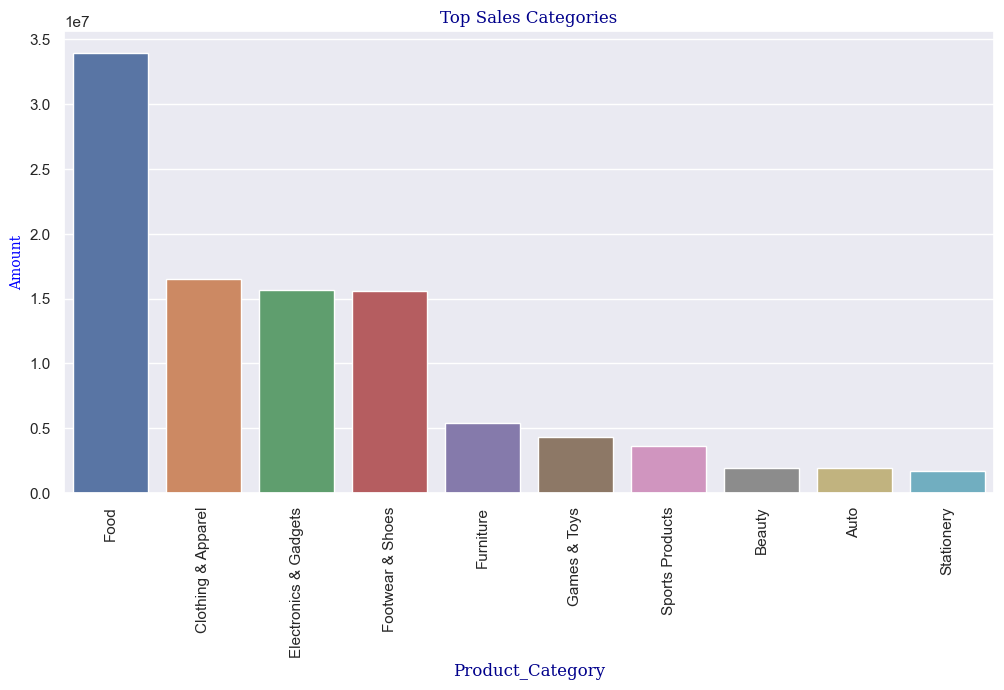

In [23]:
font1 = {'family':'serif','color':'darkblue','size':12}
font2 = {'family':'serif','color':'blue','size':10}

sales_occupation=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_occupation, x='Product_Category', y='Amount')
plt.xticks(rotation='vertical')
plt.xlabel('Product_Category', fontdict=font1)
plt.ylabel('Amount', fontdict=font2)
plt.title('Top Sales Categories', fontdict=font1)

plt.show()

From above graphs , we can see that most of the sold products are from Food, Clothing and Electronics category.

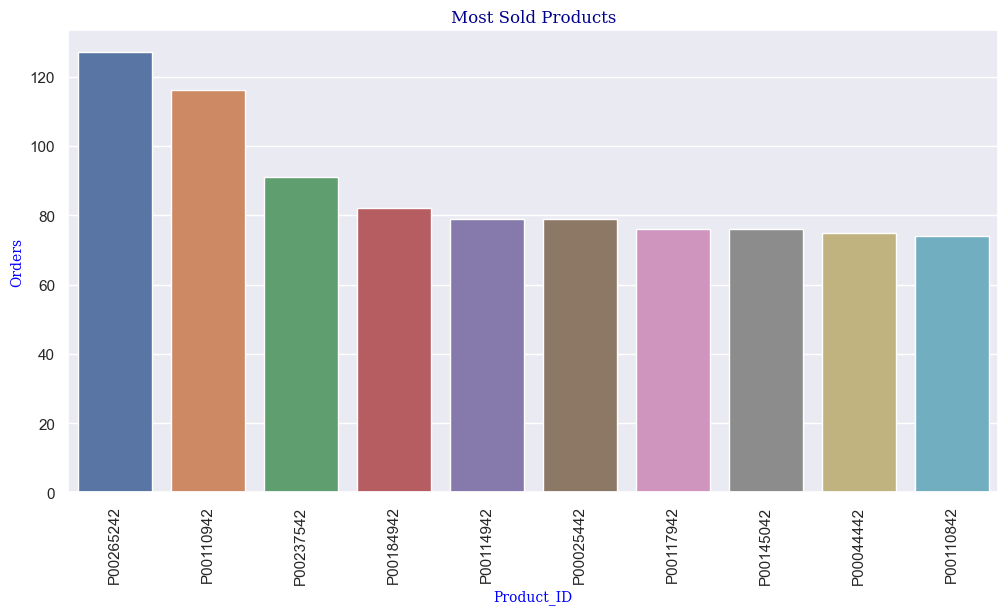

In [24]:
font1 = {'family':'serif','color':'darkblue','size':12}
font2 = {'family':'serif','color':'blue','size':10}

# Finding most sold products in respect to there product_id
sales_occupation=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(data=sales_occupation, x='Product_ID', y='Orders')
plt.xticks(rotation='vertical')
plt.xlabel('Product_ID', fontdict=font2)
plt.ylabel('Orders', fontdict=font2)
plt.title('Most Sold Products', fontdict=font1)

plt.show()

# Conclusion

Married Women aged 25-36 years from U.P, Maharastra and Karnataka working in IT, Healthcare and Aviation sector are more likely
buy products from Food, Clothing and Electronics category.